# Imports

In [46]:
import numpy as np
from model import AdaptationModel
from rbb import OrganizationInstrument
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
import pandas as pd


import numpy as np
# import np.random
from mesa import Agent
from shapely.geometry import Point
from shapely import contains_xy

# Import functions from functions.py
from functions import generate_random_location_within_map_domain, get_flood_depth, calculate_basic_flood_damage, floodplain_multipolygon
import networkx as nx
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa import batch_run
import geopandas as gpd
import rasterio as rs
import matplotlib.pyplot as plt
# Import the agent class(es) from agents.py
from agents import Households
from agents import Government

# Import functions from functions.py
from functions import get_flood_map_data, calculate_basic_flood_damage
from functions import map_domain_gdf, floodplain_gdf

from model import AdaptationModel

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Experiments

In [2]:
dyke = OrganizationInstrument(name = 'Dyke', cost = 8, completion_time = 5, protection_level = 0.7, status = 1)
wetland = OrganizationInstrument(name = 'Wetland', cost = 5,  completion_time = 2, protection_level = 0.5, status = 1)  

In [3]:
# Experiment 0
base_case = {
    "number_of_households" : 100,
    "gov_structure":'centralised',
    "gov_detector" : 1, 
    "options_list" : None,
    "flood_probability":0.05,
    "economic_status":'neutral'
        }

In [4]:
# Experiment 1
exp1 = {
    "number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [5]:
# Experiment 2
exp2 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [6]:
# Experiment 3
exp3 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [7]:
# Experiment 4
exp4 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [8]:
# Experiment 5
exp5 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [9]:
# Experiment 6
exp6 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.05,
    "economic_status": 'neutral'
}


In [10]:
# Experiment 7
exp7 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.1,
    "economic_status": 'growth'
}


In [11]:
# Experiment 8
exp8 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.1,
    "economic_status": 'recession'
}


In [12]:
# Experiment 9
exp9 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.01,
    "economic_status": 'growth'
}


In [13]:
# Experiment 10
exp10 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": None,
    "flood_probability": 0.01,
    "economic_status": 'recession'
}


In [14]:
# Experiment 11
exp11 = {"number_of_households" : 100,
    "gov_structure": 'centralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.1,
    "economic_status": 'recession'
}


In [15]:
# Experiment 12
exp12 = {"number_of_households" : 100,
    "gov_structure": 'decentralised',
    "gov_detector": 1,
    "options_list": [[dyke, wetland]],
    "flood_probability": 0.1,
    "economic_status": 'growth'
}

In [16]:
experiments = [base_case, exp1, exp2, exp3, exp4, exp5, exp6, exp7, exp8, exp9, exp10, exp11, exp12]

# Running experiments

In [38]:
import timeit

def run_experiment(experiments):
    '''Run all the experiments that are setup'''
    start = timeit.default_timer()
    num = 0
    for experiment in experiments:
        results = batch_run(
            AdaptationModel,
            parameters=experiment,
            iterations=70,
            max_steps=120,
            number_processes=1,
            data_collection_period=1,
            display_progress=True,)
        results = pd.DataFrame(results)
        results.to_csv(f'exp{num}.csv', index=False)
        num+= 1
        
    stop = timeit.default_timer()
    print('Time: ', stop - start)  
    
       

        # ax = sns.lineplot(x="Step", y=kpi, data=results, ci="sd", err_style="band", label=experiment)

        # Customize the plot
            # ax.set_title(kpi, "for Agents over 120 steps with Error Band, with 95% confidence interval")
            # ax.set_xlabel("Steps")
            # ax.set_ylabel(kpi)
            # plt.legend(title="Experiments")

    # Show the plot
plt.show()

run_experiment(experiments)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Time:  422.4582828749999


In [63]:
dfs = []
num = 0
for i in range(13):
    df = pd.read_csv(f'exp{i}.csv')
    dfs.append(df)

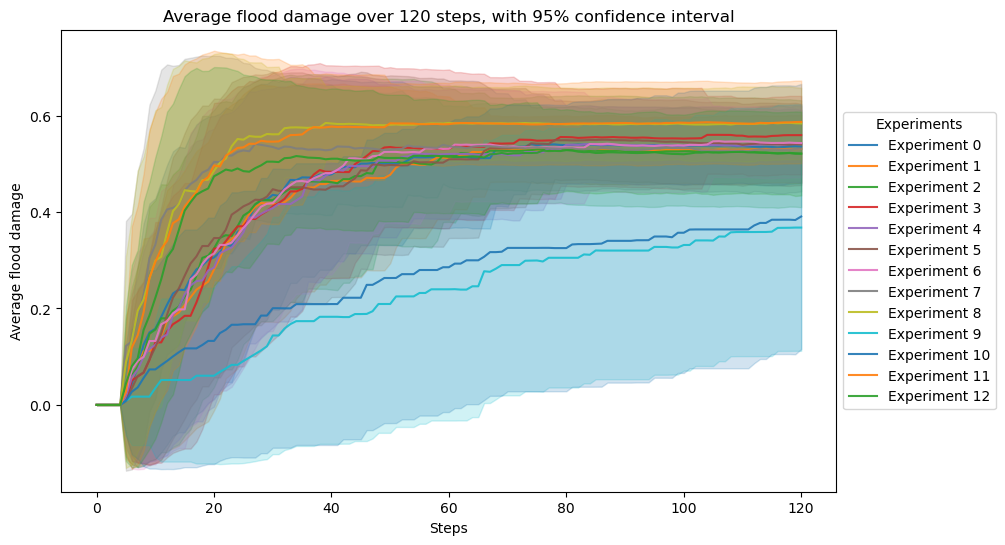

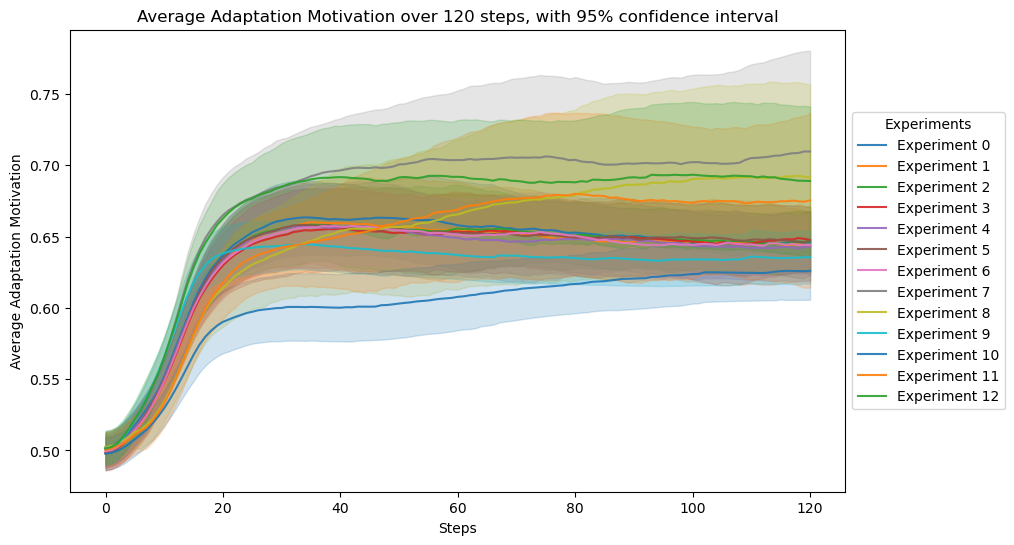

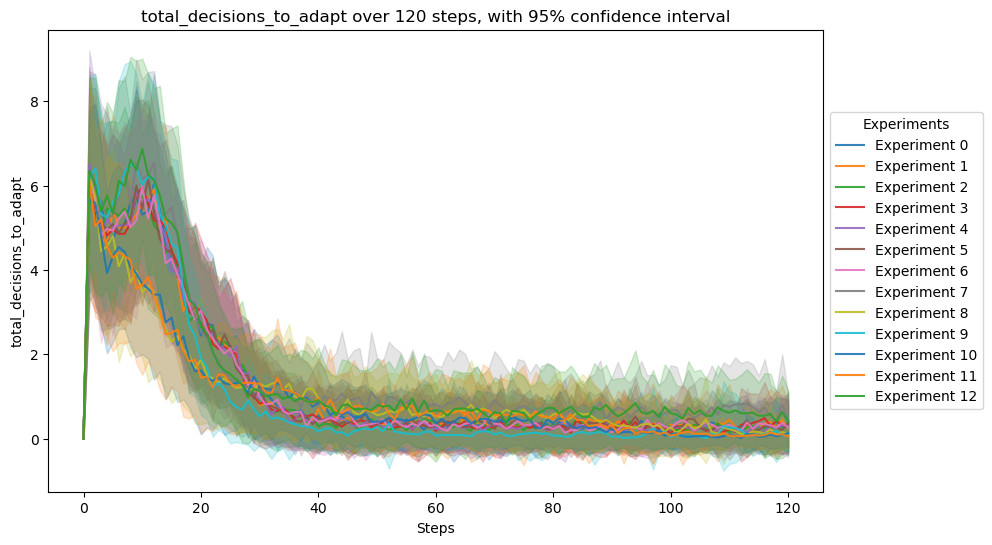

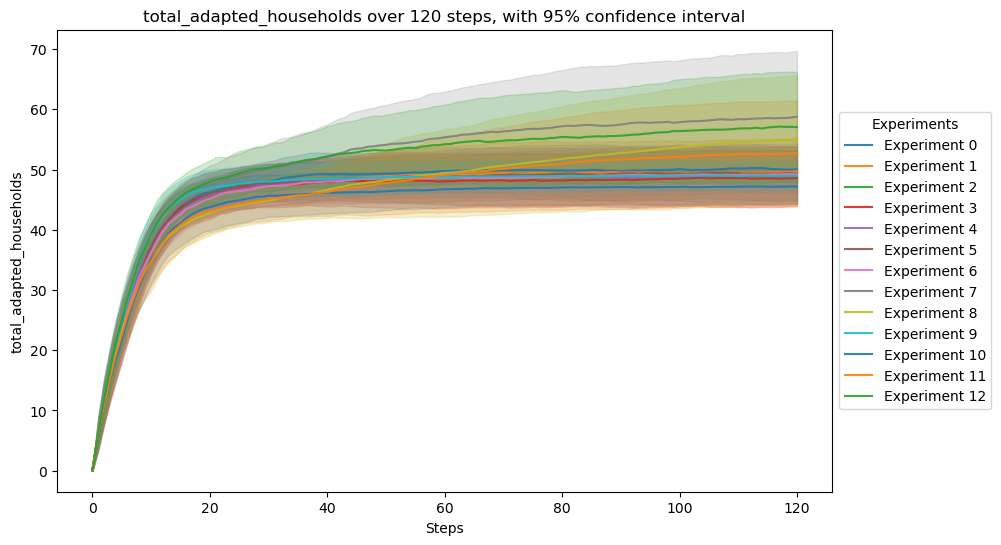

In [71]:
KPIs = ["Average flood damage", 'Average Adaptation Motivation','total_decisions_to_adapt', 'total_adapted_households']
for kpi in KPIs:
    num = 0
    plt.figure(figsize=(10, 6))
    for df in dfs:
        ax = sns.lineplot(x="Step", y=kpi, data=df, ci="sd", err_style="band", label=f"Experiment {num}", alpha=0.9)
        num += 1
        
    ax.set_title(f"{kpi} over 120 steps, with 95% confidence interval")
    ax.set_xlabel("Steps")
    ax.set_ylabel(kpi)
    plt.legend(title="Experiments", loc= 'center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(f"{kpi} over 120 steps, with 95% confidence interval")
    plt.show()